In [27]:
import pandas as pd

In [115]:
data = pd.read_csv('final_data.csv').drop(columns=["Unnamed: 0"], axis=1)
data['label'] = (data['close'] > data['close'].shift(1)) * 1
data

,date,open_x,high_x,low_x,close_x,volume_x,market cap_x,open_y,high_y,low_y,...,roc,rsi,r_50,hl_pct_change_5,cmf,T3,low_5,safe_dump_50,wprice,label
0,2015-11-15,0.8912,0.9215,0.8750,0.9064,4.118480e+05,6.774580e+07,1.0,1.0,1.0000,...,-14.500494,47.986181,-66.665400,0.146445,0.017273,333.471361,301.00,True,300.654281,0
1,2015-11-16,0.9062,0.9447,0.8920,0.9290,6.209450e+05,6.945801e+07,1.0,1.0,1.0000,...,-14.419892,50.903300,-62.643962,0.101225,0.026485,328.956688,301.00,True,300.969886,1
2,2015-11-17,0.9249,1.0300,0.9058,1.0100,1.145440e+06,7.539216e+07,1.0,1.0,1.0000,...,-10.252564,52.090292,-61.733477,0.079171,0.012844,327.028262,313.36,True,301.404360,1
3,2015-11-18,0.9932,1.0100,0.9405,0.9933,6.811040e+05,7.432077e+07,1.0,1.0,1.0000,...,-12.010204,51.934510,-61.925829,0.071067,0.004090,326.917383,315.90,True,301.763673,0
4,2015-11-19,0.9887,1.0100,0.9375,0.9555,4.435280e+05,7.151734e+07,1.0,1.0,1.0000,...,-3.167864,49.256687,-65.172732,0.071067,-0.035436,326.828088,315.90,True,302.068671,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617,2023-01-14,1451.4300,1563.7400,1450.9900,1550.7100,1.544463e+10,1.897660e+11,1.0,1.0,1.0000,...,24.586470,89.342983,-1.968685,0.227941,0.468759,18756.423324,17093.99,True,26923.873779,1
2618,2023-01-15,1550.7300,1556.9500,1520.8900,1552.4800,6.774614e+09,1.899829e+11,1.0,1.0,1.0000,...,23.176244,87.398282,-3.870844,0.215547,0.447934,19468.171193,17162.99,True,26921.508307,0
2619,2023-01-16,1552.5200,1594.0400,1529.5700,1576.8300,8.454485e+09,1.929632e+11,1.0,1.0,1.0000,...,24.857152,88.232537,-3.603991,0.187032,0.487565,20124.296268,17337.99,True,26918.364532,1
2620,2023-01-17,1577.1100,1594.0000,1553.3400,1567.8500,7.599463e+09,1.918634e+11,1.0,1.0,1.0000,...,23.815731,88.056261,-5.229787,0.143203,0.490496,20658.050508,17995.20,True,26915.489781,0


In [116]:
data[['close', 'label']]

,close,label
0,320.17,0
1,330.75,1
2,335.09,1
3,334.59,0
4,326.15,0
...,...,...
2617,20976.30,1
2618,20880.80,0
2619,21169.63,1
2620,21161.52,0


# Scaler

In [79]:
from sklearn.preprocessing import StandardScaler

y = data.pop('label')
X = data

scale = StandardScaler()
x = scale.fit_transform(X.iloc[:, 1:])
x = pd.DataFrame(x , columns=X.columns[1:])

# Random Forest

Elapsed time to compute the importances: 0.013 seconds


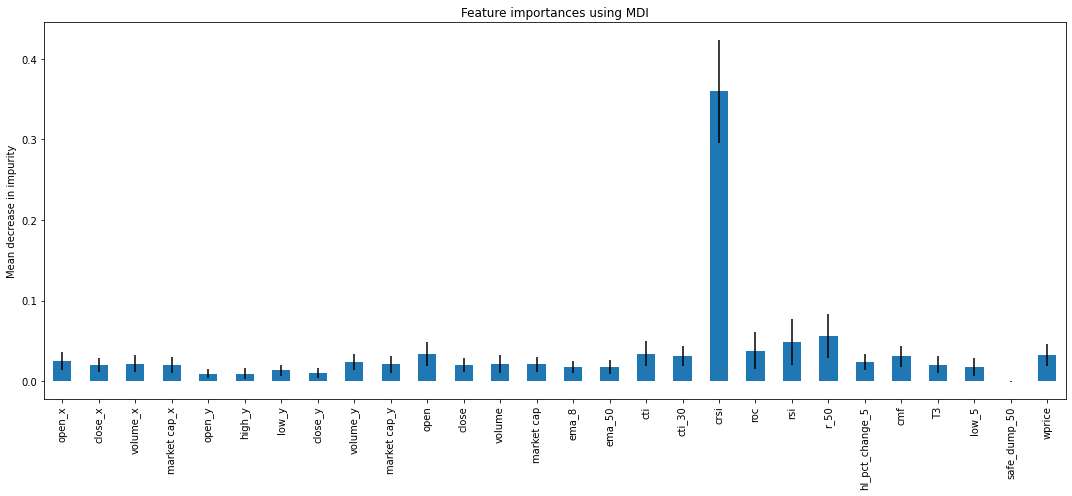

In [175]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

feature_names = x.columns
forest = RandomForestClassifier(random_state=0)
forest.fit(x, y)

import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
fig.set_size_inches(15,7)
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()



In [185]:
rforest_features = forest_importances[forest_importances > 0.025].index.to_list()

In [ ]:
'market cap', 'market cap_x', 'market cap_y', 'crsi', 'rsi', 'roc', 'r50', 'close', 'wprice'

# Patterns

### 1: btc price trend

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_x = scaler.fit_transform(X.iloc[: , 1:])
scaled_x = pd.DataFrame(scaled_x , columns=X.columns[1:])

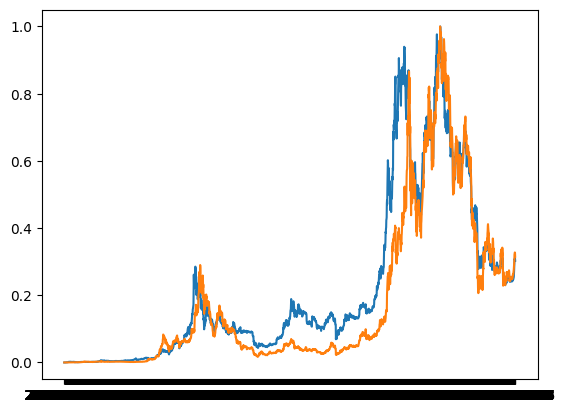

In [6]:
plt.plot(X.date , scaled_x.close)
plt.plot(X.date, scaled_x.close_x)



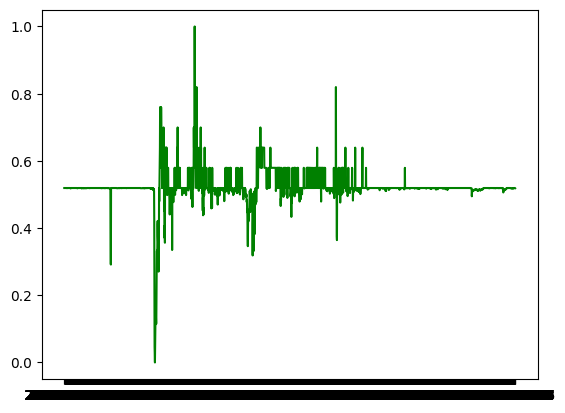

In [7]:
plt.plot(X.date, scaled_x.close_y , color= 'g')


### 2: candle stick

In [8]:
X.date = pd.to_datetime(X.date)


In [9]:
df_n = X.set_index('date')
df_n = df_n.resample("1M").agg({
        "open": "first",
        "high": "max",
        "low": "min",
        "close": "last",
        'volume': 'sum'
    })

In [10]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


fig = go.Figure(data=[go.Candlestick(x=df_n.index,
                open=df_n['open'],
                high=df_n['high'],
                low=df_n['low'],
                close=df_n['close'])])

fig.update_layout(plot_bgcolor="white", title_text='bitcoin 1 month')
fig.show()

In [11]:
df_n = X.set_index('date')
df_n = df_n.resample("1M").agg({
        "open_x": "first",
        "high_x": "max",
        "low_x": "min",
        "close_x": "last",
        'volume_x': 'sum'
    })

fig = go.Figure(data=[go.Candlestick(x=df_n.index,
                open=df_n['open_x'],
                high=df_n['high_x'],
                low=df_n['low_x'],
                close=df_n['close_x'])])

fig.update_layout(plot_bgcolor="white", title_text='ete 1 month')
fig.show()

In [12]:
df_n = X.set_index('date')
df_n = df_n.resample("1M").agg({
        "open_y": "first",
        "high_y": "max",
        "low_y": "min",
        "close_y": "last",
        'volume_y': 'sum'
    })

fig = go.Figure(data=[go.Candlestick(x=df_n.index,
                open=df_n['open_y'],
                high=df_n['high_y'],
                low=df_n['low_y'],
                close=df_n['close_y'])])

fig.update_layout(plot_bgcolor="white", title_text='ete 1 month')
fig.show()

### pattern 3:

In [18]:
df_n = x
df_n['date'] = X.date
df_n = df_n[df_n['date'] >= '2022-12-18'][df_n['date'] <= '2023-01-18'].reset_index().drop(['index'], axis=1)
fig = go.Figure(data=[go.Scatter(x=df_n['date'],
                y=df_n['close'])])

fig.update_layout(plot_bgcolor="white", title_text='bitcoin 1m scaled close price of 2019-01-01 -- 2019-02-01')
fig.show()

C:\Users\Keyhan\AppData\Local\Temp\ipykernel_376\4210659882.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [19]:
l_period = len(df_n)
pattern = df_n['close'].values

In [31]:
def calc_mape(actual, predic):
    return np.mean(np.abs((actual - predic) / actual))

In [30]:
def similarity_fun(metric, pattern2):
    l = range(len(pattern2) - l_period)
    minimum = 9999
    start = -1
    end = -1
    for i in l:
        d = metric(pattern, pattern2[i: i+l_period])
        if d < minimum:
            minimum = d
            start = i
            end = i+l_period
    return minimum, start, end

In [20]:
df_n = x
df_n['date'] = X.date
df_2 = df_n[df_n['date'] < '2022-12-18'].reset_index().drop(['index'], axis=1)
pattern2 = df_2['close'].values
minimum, start, end = similarity_fun(calc_mape, pattern2)

print(f"max similarity of {df_2['date'].iat[start]} -- {df_2['date'].iat[end]}: {minimum}")

max similarity of 2022-11-12 00:00:00 -- 2022-12-14 00:00:00: 0.22884904135021078


In [25]:
df_n = x
df_n['date'] = X.date
df_n = df_n[df_n['date'] >= '2022-12-18'][df_n['date'] <= '2023-01-18'].reset_index().drop(['index'], axis=1)
fig = go.Figure(data=[go.Scatter(x=df_n['date'],
                y=df_n['close'])])

fig.update_layout(plot_bgcolor="white", title_text='bitcoin 1m scaled close price of 2019-01-01 -- 2019-02-01')
fig.show()

df_n = x
df_n['date'] = X.date
df_n = df_n[df_n['date'] >= '2022-11-12'][df_n['date'] <= '2022-12-14'].reset_index().drop(['index'], axis=1)
fig = go.Figure(data=[go.Scatter(x=df_n['date'],
                y=df_n['close'])])

fig.update_layout(plot_bgcolor="white", title_text='bitcoin 1m scaled close price of 2019-02-14 -- 2019-03-17')
fig.show()

C:\Users\Keyhan\AppData\Local\Temp\ipykernel_376\680772997.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



C:\Users\Keyhan\AppData\Local\Temp\ipykernel_376\680772997.py:12: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [33]:
df_n = x
df_n['date'] = X.date
pattern2 = df_n['close_x'].values
minimum, start, end = similarity_fun(calc_mape, pattern2)

print(f"max similarity of {df_n['date'].iat[start]} -- {df_n['date'].iat[end]}: {minimum}")

max similarity of 2018-02-01 00:00:00 -- 2018-03-05 00:00:00: 0.8150529809342746


In [34]:
df_n = x
df_n['date'] = X.date
df_n = df_n[df_n['date'] >= '2022-12-18'][df_n['date'] <= '2023-01-18'].reset_index().drop(['index'], axis=1)
fig = go.Figure(data=[go.Scatter(x=df_n['date'],
                y=df_n['close'])])

fig.update_layout(plot_bgcolor="white", title_text='bitcoin 1m scaled close price of 2019-01-01 -- 2019-02-01')
fig.show()

df_n = x
df_n['date'] = X.date
df_n = df_n[df_n['date'] >= '2018-02-01'][df_n['date'] <= '2018-03-05'].reset_index().drop(['index'], axis=1)
fig = go.Figure(data=[go.Scatter(x=df_n['date'],
                y=df_n['close_x'])])

fig.update_layout(plot_bgcolor="white", title_text='bitcoin 1m scaled close price of 2019-02-14 -- 2019-03-17')
fig.show()

C:\Users\Keyhan\AppData\Local\Temp\ipykernel_376\798748724.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



C:\Users\Keyhan\AppData\Local\Temp\ipykernel_376\798748724.py:12: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [36]:
def similarity_fun(metric, pattern2):
    l = range(len(pattern2) - l_period)
    maximum = -2
    start = -1
    end = -1
    for i in l:
        d = metric(pattern, pattern2[i: i+l_period])
        if d > maximum:
            maximum = d
            start = i
            end = i+l_period
    return maximum, start, end

def calc_correlation(actual, predic):
    a_diff = actual - np.mean(actual)
    p_diff = predic - np.mean(predic)

    numerator = np.sum(a_diff * p_diff)

    denominator = np.sqrt(np.sum(a_diff ** 2)) * np.sqrt(np.sum(p_diff ** 2))
    return numerator / denominator

In [37]:
df_n = x
df_n['date'] = X.date
df_2 = df_n[df_n['date'] < '2022-12-18'].reset_index().drop(['index'], axis=1)
pattern2 = df_2['close'].values
maximum, start, end = similarity_fun(calc_correlation, pattern2)

print(f"max similarity of {df_2['date'].iat[start]} -- {df_2['date'].iat[end]}: {maximum}")

max similarity of 2020-07-02 00:00:00 -- 2020-08-03 00:00:00: 0.9760954125842528


In [38]:
df_n = x
df_n['date'] = X.date
df_n = df_n[df_n['date'] >= '2022-12-18'][df_n['date'] <= '2023-01-18'].reset_index().drop(['index'], axis=1)
fig = go.Figure(data=[go.Scatter(x=df_n['date'],
                y=df_n['close'])])

fig.update_layout(plot_bgcolor="white", title_text='bitcoin 1m scaled close price of 2019-01-01 -- 2019-02-01')
fig.show()

df_n = x
df_n['date'] = X.date
df_n = df_n[df_n['date'] >= '2020-07-02'][df_n['date'] <= '2020-08-03'].reset_index().drop(['index'], axis=1)
fig = go.Figure(data=[go.Scatter(x=df_n['date'],
                y=df_n['close'])])

fig.update_layout(plot_bgcolor="white", title_text='bitcoin 1m scaled close price of 2019-02-14 -- 2019-03-17')
fig.show()

C:\Users\Keyhan\AppData\Local\Temp\ipykernel_376\3497908144.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



C:\Users\Keyhan\AppData\Local\Temp\ipykernel_376\3497908144.py:12: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [40]:
df_n = x
df_n['date'] = X.date
pattern2 = df_n['close_x'].values
maximum, start, end = similarity_fun(calc_correlation, pattern2)

print(f"max similarity of {df_n['date'].iat[start]} -- {df_n['date'].iat[end]}: {maximum}")

max similarity of 2020-12-10 00:00:00 -- 2021-01-11 00:00:00: 0.973527337713697


In [42]:
df_n = x
df_n['date'] = X.date
df_n = df_n[df_n['date'] >= '2022-12-18'][df_n['date'] <= '2023-01-18'].reset_index().drop(['index'], axis=1)
fig = go.Figure(data=[go.Scatter(x=df_n['date'],
                y=df_n['close'])])

fig.update_layout(plot_bgcolor="white", title_text='bitcoin 1m scaled close price of 2019-01-01 -- 2019-02-01')
fig.show()

df_n = x
df_n['date'] = X.date
df_n = df_n[df_n['date'] >= '2020-12-10'][df_n['date'] <= '2021-01-11'].reset_index().drop(['index'], axis=1)
fig = go.Figure(data=[go.Scatter(x=df_n['date'],
                y=df_n['close_x'])])

fig.update_layout(plot_bgcolor="white", title_text='bitcoin 1m scaled close price of 2019-02-14 -- 2019-03-17')
fig.show()

C:\Users\Keyhan\AppData\Local\Temp\ipykernel_376\522092708.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



C:\Users\Keyhan\AppData\Local\Temp\ipykernel_376\522092708.py:12: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



# Feature Selection

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create correlation matrix
corr_matrix = x.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.99)]

# Drop features 
# df.drop(to_drop, axis=1, inplace=True)
to_drop


['high_x',
 'low_x',
 'close_x',
 'market cap_x',
 'high',
 'low',
 'close',
 'market cap',
 'ema_8',
 'T3',
 'low_5']

In [82]:
x.drop(['high_x' , 'low_x' , 'high' , 'low'], axis=1, inplace=True)

In [7]:
x.dtypes

open_x             float64
close_x            float64
volume_x           float64
market cap_x       float64
open_y             float64
high_y             float64
low_y              float64
close_y            float64
volume_y           float64
market cap_y       float64
open               float64
close              float64
volume             float64
market cap         float64
ema_8              float64
ema_50             float64
cti                float64
cti_30             float64
crsi               float64
roc                float64
rsi                float64
r_50               float64
hl_pct_change_5    float64
cmf                float64
T3                 float64
low_5              float64
safe_dump_50       float64
wprice             float64
dtype: object

In [332]:
train_ratio = 0.9
l = int(train_ratio * len(x))
x_train = x.iloc[:l]
y_train = y.iloc[:l]
x_test = x.iloc[l:]
y_test = y.iloc[l:]

In [347]:
accuracies = {}

In [ ]:
np.random.seed(1)
tf.random.set_seed(1)

# Logistic Regression

In [333]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [334]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [335]:
model.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [336]:
y_train.value_counts()

1    1288
0    1071
Name: label, dtype: int64

In [337]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [345]:
from sklearn.metrics import classification_report, accuracy_score
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       1.00      0.09      0.16       139
           1       0.49      1.00      0.66       124

    accuracy                           0.52       263
   macro avg       0.75      0.54      0.41       263
weighted avg       0.76      0.52      0.40       263



In [348]:
accuracies['l_reg'] = accuracy_score(y_test, y_pred)

# SVM

In [349]:
from sklearn.svm import SVC  
clf = SVC(kernel='sigmoid') 
  
# fitting x samples and y classes 
clf.fit(x_train, y_train) 

SVC(kernel='sigmoid')

In [350]:
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [351]:
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       139
           1       0.76      0.74      0.75       124

    accuracy                           0.77       263
   macro avg       0.77      0.77      0.77       263
weighted avg       0.77      0.77      0.77       263



In [352]:
accuracies['svm'] = accuracy_score(y_test, y_pred)

# Decision tree

In [353]:
from sklearn.tree import DecisionTreeClassifier 

clf = DecisionTreeClassifier()

clf = clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [354]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       139
           1       0.87      0.94      0.90       124

    accuracy                           0.90       263
   macro avg       0.91      0.91      0.90       263
weighted avg       0.91      0.90      0.91       263



In [355]:
accuracies['decision_tree'] = accuracy_score(y_test, y_pred)

# KNN

In [356]:
from sklearn.neighbors import KNeighborsClassifier
nbrs = KNeighborsClassifier(n_neighbors=2).fit(x_train,y_train)
y_pred = nbrs.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [357]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.73      0.67      0.70       139
           1       0.66      0.72      0.69       124

    accuracy                           0.69       263
   macro avg       0.69      0.69      0.69       263
weighted avg       0.69      0.69      0.69       263



In [358]:
accuracies['knn'] = accuracy_score(y_test, y_pred)

# 

# Transformer

In [359]:
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [360]:
#set labels for training data to categorical
from tensorflow.keras.utils import to_categorical
train_y = to_categorical(y_train, 2)

In [361]:
x_train.shape

(2359, 28)

In [362]:
# # reshape input to be 3D [samples, timesteps, features]
train_X = x_train.values.reshape((x_train.shape[0], x_train.shape[1], 1))
test_X = x_test.values.reshape((x_test.shape[0], x_test.shape[1], 1))

In [363]:
train_X.shape

(2359, 28, 1)

In [364]:
#set labels for training data to categorical
from tensorflow.keras.utils import to_categorical
train_y = to_categorical(y_train, 2)

In [365]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(2, activation="softmax")(x)
    return keras.Model(inputs, outputs)


In [366]:
input_shape = train_X.shape[1:]

model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=8,
    mlp_units=[128],
    mlp_dropout=0.1,
    dropout=0.2,
)

model.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-3, decay=1e-3/10),
    metrics=["categorical_accuracy"],
)

history = model.fit(
    train_X,
    train_y,
    epochs=15,
    batch_size=32,
)

Epoch 1/15
74/74 [==============================] - 34s 372ms/step - loss: 0.6510 - categorical_accuracy: 0.6337
Epoch 2/15
74/74 [==============================] - 28s 385ms/step - loss: 0.5154 - categorical_accuracy: 0.7469
Epoch 3/15
74/74 [==============================] - 26s 347ms/step - loss: 0.4674 - categorical_accuracy: 0.7969
Epoch 4/15
74/74 [==============================] - 27s 366ms/step - loss: 0.4198 - categorical_accuracy: 0.8173
Epoch 5/15
74/74 [==============================] - 26s 354ms/step - loss: 0.3942 - categorical_accuracy: 0.8300
Epoch 6/15
74/74 [==============================] - 26s 356ms/step - loss: 0.3720 - categorical_accuracy: 0.8393
Epoch 7/15
74/74 [==============================] - 27s 359ms/step - loss: 0.3505 - categorical_accuracy: 0.8406
Epoch 8/15
74/74 [==============================] - 28s 379ms/step - loss: 0.3283 - categorical_accuracy: 0.8605
Epoch 9/15
74/74 [==============================] - 27s 369ms/step - loss: 0.3182 - categorical_

In [367]:
pred = model.predict(test_X)
#reshape again
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1],))

In [368]:
pred = np.argmax(pred, axis=1)

In [369]:
print(classification_report(y_test, pred, zero_division=0,))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60       139
           1       0.61      1.00      0.76       124

    accuracy                           0.70       263
   macro avg       0.81      0.72      0.68       263
weighted avg       0.82      0.70      0.68       263



In [373]:
accuracies['transformer'] = accuracy_score(y_test, pred)

In [171]:
model.save('transfomer_model')

INFO:tensorflow:Assets written to: transfomer_model/assets


INFO:tensorflow:Assets written to: transfomer_model/assets


In [172]:
y2 = to_categorical(y, 2)

In [173]:
input_shape = train_X.shape[1:]

model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=8,
    mlp_units=[128],
    mlp_dropout=0.1,
    dropout=0.2,
)

model.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-3, decay=1e-3/10),
    metrics=["categorical_accuracy"],
)

history = model.fit(
    x,
    y2,
    epochs=15,
    batch_size=32,
)

Epoch 1/15
82/82 [==============================] - 37s 354ms/step - loss: 0.6203 - categorical_accuracy: 0.6552
Epoch 2/15
82/82 [==============================] - 28s 341ms/step - loss: 0.5116 - categorical_accuracy: 0.7498
Epoch 3/15
82/82 [==============================] - 32s 391ms/step - loss: 0.4664 - categorical_accuracy: 0.7841
Epoch 4/15
82/82 [==============================] - 29s 350ms/step - loss: 0.4261 - categorical_accuracy: 0.8135
Epoch 5/15
82/82 [==============================] - 29s 351ms/step - loss: 0.3930 - categorical_accuracy: 0.8349
Epoch 6/15
82/82 [==============================] - 28s 339ms/step - loss: 0.3655 - categorical_accuracy: 0.8513
Epoch 7/15
82/82 [==============================] - 30s 370ms/step - loss: 0.3476 - categorical_accuracy: 0.8547
Epoch 8/15
82/82 [==============================] - 27s 334ms/step - loss: 0.3230 - categorical_accuracy: 0.8642
Epoch 9/15
82/82 [==============================] - 27s 331ms/step - loss: 0.3055 - categorical_

In [174]:
model.save('transformer_final_model')

INFO:tensorflow:Assets written to: transformer_final_model/assets


INFO:tensorflow:Assets written to: transformer_final_model/assets


# BiLSTM

In [123]:
from keras.layers import Bidirectional
from keras.layers import Dense
from keras.layers import LSTM

In [374]:
model = Sequential()
neurons = 64
epochs = 20
dropout = 0.2
batch_size = 64
activ_func = "linear"

model.add(Bidirectional(LSTM(neurons, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2]), activation=activ_func)))
model.add(Dropout(dropout))

model.add(Bidirectional(LSTM(neurons, return_sequences=False, activation=activ_func)))
model.add(Dropout(dropout))

model.add(Dense(2, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [375]:
# fit network
history = model.fit(train_X, train_y, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=False)

Epoch 1/20
37/37 [==============================] - 8s 68ms/step - loss: 0.6689 - accuracy: 0.5735
Epoch 2/20
37/37 [==============================] - 3s 70ms/step - loss: 0.6559 - accuracy: 0.6032
Epoch 3/20
37/37 [==============================] - 3s 69ms/step - loss: 0.6544 - accuracy: 0.6138
Epoch 4/20
37/37 [==============================] - 2s 60ms/step - loss: 0.6525 - accuracy: 0.6053
Epoch 5/20
37/37 [==============================] - 2s 65ms/step - loss: 0.6474 - accuracy: 0.6159
Epoch 6/20
37/37 [==============================] - 3s 69ms/step - loss: 0.6508 - accuracy: 0.6092
Epoch 7/20
37/37 [==============================] - 2s 67ms/step - loss: 0.6474 - accuracy: 0.6134
Epoch 8/20
37/37 [==============================] - 2s 66ms/step - loss: 0.6498 - accuracy: 0.6138
Epoch 9/20
37/37 [==============================] - 2s 65ms/step - loss: 0.6465 - accuracy: 0.6147
Epoch 10/20
37/37 [==============================] - 2s 62ms/step - loss: 0.6460 - accuracy: 0.6134
Epoch 11/

In [376]:
pred = model.predict(test_X)
#reshape again
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1],))
pred = np.argmax(pred, axis=1)

In [377]:
print(classification_report(y_test, pred, zero_division=0,))

              precision    recall  f1-score   support

           0       0.57      0.81      0.67       139
           1       0.59      0.31      0.40       124

    accuracy                           0.57       263
   macro avg       0.58      0.56      0.54       263
weighted avg       0.58      0.57      0.54       263



In [378]:
accuracies['bilstm'] = accuracy_score(y_test, pred)

# CNN

In [138]:
from keras.layers import Convolution1D, Conv1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense

In [383]:
model = Sequential()
neurons = 64
epochs = 20
dropout = 0.2
batch_size = 32
activ_func = "ReLU"

model.add(Conv1D(neurons, kernel_size=2, padding='same', input_shape=(train_X.shape[1], train_X.shape[2]), activation=activ_func))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Dropout(dropout))

model.add(Conv1D(neurons, kernel_size=2, padding='same', activation=activ_func))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Dropout(dropout))

model.add(Conv1D(neurons, kernel_size=2, padding='same', activation=activ_func))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Dropout(dropout))

model.add(Conv1D(neurons, kernel_size=2, padding='same', activation=activ_func))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Dropout(dropout))

model.add(Conv1D(neurons, kernel_size=2, padding='same', activation=activ_func))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Dropout(dropout))

#flatten and add a dense layer and to output the prediction
model.add(Flatten())
model.add(Dense(2, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [384]:
# fit network
history = model.fit(train_X, train_y, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=False)

Epoch 1/20
74/74 [==============================] - 1s 7ms/step - loss: 0.6877 - accuracy: 0.5549
Epoch 2/20
74/74 [==============================] - 1s 9ms/step - loss: 0.6791 - accuracy: 0.5405
Epoch 3/20
74/74 [==============================] - 1s 7ms/step - loss: 0.6524 - accuracy: 0.6240
Epoch 4/20
74/74 [==============================] - 1s 7ms/step - loss: 0.6258 - accuracy: 0.6515
Epoch 5/20
74/74 [==============================] - 1s 7ms/step - loss: 0.6024 - accuracy: 0.6804
Epoch 6/20
74/74 [==============================] - 1s 10ms/step - loss: 0.5690 - accuracy: 0.7126
Epoch 7/20
74/74 [==============================] - 1s 7ms/step - loss: 0.5545 - accuracy: 0.7185
Epoch 8/20
74/74 [==============================] - 0s 7ms/step - loss: 0.5411 - accuracy: 0.7317
Epoch 9/20
74/74 [==============================] - 1s 7ms/step - loss: 0.5179 - accuracy: 0.7533
Epoch 10/20
74/74 [==============================] - 1s 8ms/step - loss: 0.5156 - accuracy: 0.7452
Epoch 11/20
74/74 

In [385]:
pred = model.predict(test_X)
#reshape again
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1],))
pred = np.argmax(pred, axis=1)

In [386]:
print(classification_report(y_test, pred, zero_division=0,))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90       139
           1       0.98      0.77      0.86       124

    accuracy                           0.88       263
   macro avg       0.90      0.88      0.88       263
weighted avg       0.90      0.88      0.88       263



In [387]:
accuracies['cnn'] = accuracy_score(y_test, pred)

In [151]:
model.save('cnn_model')

2023-01-21 12:29:08.138929: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: cnn_model/assets


INFO:tensorflow:Assets written to: cnn_model/assets


In [152]:
y2 = to_categorical(y, 2)

In [155]:
history = model.fit(x, y2, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=False)

Epoch 1/20
82/82 [==============================] - 2s 7ms/step - loss: 0.6885 - accuracy: 0.5652
Epoch 2/20
82/82 [==============================] - 1s 7ms/step - loss: 0.6853 - accuracy: 0.5458
Epoch 3/20
82/82 [==============================] - 1s 6ms/step - loss: 0.6657 - accuracy: 0.5919
Epoch 4/20
82/82 [==============================] - 1s 7ms/step - loss: 0.6482 - accuracy: 0.6369
Epoch 5/20
82/82 [==============================] - 1s 7ms/step - loss: 0.6124 - accuracy: 0.6823
Epoch 6/20
82/82 [==============================] - 1s 8ms/step - loss: 0.5540 - accuracy: 0.7265
Epoch 7/20
82/82 [==============================] - 1s 7ms/step - loss: 0.5608 - accuracy: 0.7182
Epoch 8/20
82/82 [==============================] - 1s 7ms/step - loss: 0.5391 - accuracy: 0.7426
Epoch 9/20
82/82 [==============================] - 1s 7ms/step - loss: 0.5354 - accuracy: 0.7376
Epoch 10/20
82/82 [==============================] - 1s 6ms/step - loss: 0.5090 - accuracy: 0.7624
Epoch 11/20
82/82 [

In [156]:
model.save('cnn_final_model')

INFO:tensorflow:Assets written to: cnn_final_model/assets


INFO:tensorflow:Assets written to: cnn_final_model/assets


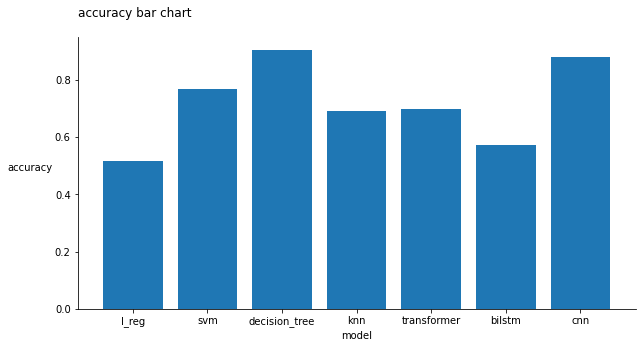

In [404]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax.bar(accuracies.keys(), accuracies.values())
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel('accuracy', rotation=0, labelpad=25)
plt.xlabel('model')
plt.title('accuracy bar chart', loc='left', pad=20);
plt.show()

# part 2

In [411]:
x_ = x[rforest_features]
train_ratio = 0.9
l = int(train_ratio * len(x_))
x_train = x_.iloc[:l]
y_train = y.iloc[:l]
x_test = x_.iloc[l:]
y_test = y.iloc[l:]

# Logistic Regression

In [414]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [415]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [416]:
model.fit(x_train, y_train)


LogisticRegression(random_state=0, solver='liblinear')

In [408]:
y_train.value_counts()

1    1288
0    1071
Name: label, dtype: int64

In [409]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [410]:
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       1.00      0.08      0.15       139
           1       0.49      1.00      0.66       124

    accuracy                           0.51       263
   macro avg       0.75      0.54      0.40       263
weighted avg       0.76      0.51      0.39       263



In [417]:
accuracies['l_reg'] = accuracy_score(y_test, y_pred)

# SVM

In [418]:
from sklearn.svm import SVC  
clf = SVC(kernel='sigmoid') 
  
# fitting x samples and y classes 
clf.fit(x_train, y_train) 

SVC(kernel='sigmoid')

In [419]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1])

In [420]:
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       139
           1       0.69      0.71      0.70       124

    accuracy                           0.71       263
   macro avg       0.71      0.71      0.71       263
weighted avg       0.72      0.71      0.71       263



In [422]:
accuracies['svm'] = accuracy_score(y_test, y_pred)

# Decision tree

In [426]:
from sklearn.tree import DecisionTreeClassifier 

clf = DecisionTreeClassifier()

clf = clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [427]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       139
           1       0.87      0.94      0.90       124

    accuracy                           0.90       263
   macro avg       0.91      0.91      0.90       263
weighted avg       0.91      0.90      0.91       263



In [428]:
accuracies['decision_tree'] = accuracy_score(y_test, y_pred)

# KNN

In [429]:
from sklearn.neighbors import KNeighborsClassifier
nbrs = KNeighborsClassifier(n_neighbors=2).fit(x_train,y_train)
y_pred = nbrs.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [430]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.87      0.75      0.81       139
           1       0.76      0.88      0.81       124

    accuracy                           0.81       263
   macro avg       0.82      0.81      0.81       263
weighted avg       0.82      0.81      0.81       263



In [431]:
accuracies['knn'] = accuracy_score(y_test, y_pred)

# 

# Transformer

In [432]:
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [433]:
#set labels for training data to categorical
from tensorflow.keras.utils import to_categorical
train_y = to_categorical(y_train, 2)

In [214]:
x_train.shape

(2359, 10)

In [434]:
# # reshape input to be 3D [samples, timesteps, features]
train_X = x_train.values.reshape((x_train.shape[0], x_train.shape[1], 1))
test_X = x_test.values.reshape((x_test.shape[0], x_test.shape[1], 1))

In [435]:
train_X.shape

(2359, 10, 1)

In [436]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(2, activation="softmax")(x)
    return keras.Model(inputs, outputs)


In [437]:
input_shape = train_X.shape[1:]

model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=8,
    mlp_units=[128],
    mlp_dropout=0.1,
    dropout=0.2,
)

model.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-3, decay=1e-3/10),
    metrics=["categorical_accuracy"],
)

history = model.fit(
    train_X,
    train_y,
    epochs=15,
    batch_size=32,
)

Epoch 1/15
74/74 [==============================] - 20s 133ms/step - loss: 0.6382 - categorical_accuracy: 0.6401
Epoch 2/15
74/74 [==============================] - 10s 130ms/step - loss: 0.5317 - categorical_accuracy: 0.7516
Epoch 3/15
74/74 [==============================] - 10s 137ms/step - loss: 0.4816 - categorical_accuracy: 0.7855
Epoch 4/15
74/74 [==============================] - 10s 139ms/step - loss: 0.4437 - categorical_accuracy: 0.8122
Epoch 5/15
74/74 [==============================] - 10s 134ms/step - loss: 0.4171 - categorical_accuracy: 0.8232
Epoch 6/15
74/74 [==============================] - 10s 141ms/step - loss: 0.3953 - categorical_accuracy: 0.8300
Epoch 7/15
74/74 [==============================] - 10s 139ms/step - loss: 0.3770 - categorical_accuracy: 0.8359
Epoch 8/15
74/74 [==============================] - 10s 134ms/step - loss: 0.3603 - categorical_accuracy: 0.8453
Epoch 9/15
74/74 [==============================] - 10s 136ms/step - loss: 0.3488 - categorical_

In [441]:
pred = model.predict(test_X)
#reshape again
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1],))

In [442]:
pred = np.argmax(pred, axis=1)

In [443]:
print(classification_report(y_test, pred, zero_division=0,))

              precision    recall  f1-score   support

           0       1.00      0.30      0.46       139
           1       0.56      1.00      0.72       124

    accuracy                           0.63       263
   macro avg       0.78      0.65      0.59       263
weighted avg       0.79      0.63      0.58       263



In [444]:
accuracies['transformer'] = accuracy_score(y_test, pred)

# BiLSTM

In [223]:
from keras.layers import Bidirectional
from keras.layers import Dense
from keras.layers import LSTM

In [449]:
model = Sequential()
neurons = 64
epochs = 20
dropout = 0.2
batch_size = 64
activ_func = "linear"

model.add(Bidirectional(LSTM(neurons, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2]), activation=activ_func)))
model.add(Dropout(dropout))

model.add(Bidirectional(LSTM(neurons, return_sequences=False, activation=activ_func)))
model.add(Dropout(dropout))

model.add(Dense(2, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [450]:
# fit network
history = model.fit(train_X, train_y, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=False)

Epoch 1/20
37/37 [==============================] - 6s 34ms/step - loss: 0.6591 - accuracy: 0.6070
Epoch 2/20
37/37 [==============================] - 1s 33ms/step - loss: 0.6475 - accuracy: 0.6181
Epoch 3/20
37/37 [==============================] - 1s 37ms/step - loss: 0.6444 - accuracy: 0.6142
Epoch 4/20
37/37 [==============================] - 1s 27ms/step - loss: 0.6443 - accuracy: 0.6193
Epoch 5/20
37/37 [==============================] - 1s 28ms/step - loss: 0.6431 - accuracy: 0.6172
Epoch 6/20
37/37 [==============================] - 1s 28ms/step - loss: 0.6412 - accuracy: 0.6227
Epoch 7/20
37/37 [==============================] - 1s 26ms/step - loss: 0.6412 - accuracy: 0.6253
Epoch 8/20
37/37 [==============================] - 1s 30ms/step - loss: 0.6403 - accuracy: 0.6291
Epoch 9/20
37/37 [==============================] - 1s 32ms/step - loss: 0.6377 - accuracy: 0.6308
Epoch 10/20
37/37 [==============================] - 1s 37ms/step - loss: 0.6355 - accuracy: 0.6371
Epoch 11/

In [451]:
pred = model.predict(test_X)
#reshape again
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1],))
pred = np.argmax(pred, axis=1)

In [452]:
print(classification_report(y_test, pred, zero_division=0,))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       139
           1       0.78      0.78      0.78       124

    accuracy                           0.79       263
   macro avg       0.79      0.79      0.79       263
weighted avg       0.79      0.79      0.79       263



In [454]:
accuracies['bilstm'] = accuracy_score(y_test, pred)

# CNN

In [228]:
from keras.layers import Convolution1D, Conv1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense

In [461]:
model = Sequential()
neurons = 64
epochs = 20
dropout = 0.2
batch_size = 32
activ_func = "ReLU"

model.add(Conv1D(neurons, kernel_size=2, padding='same', input_shape=(train_X.shape[1], train_X.shape[2]), activation=activ_func))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Dropout(dropout))

model.add(Conv1D(neurons, kernel_size=2, padding='same', activation=activ_func))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Dropout(dropout))

model.add(Conv1D(neurons, kernel_size=2, padding='same', activation=activ_func))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Dropout(dropout))

model.add(Conv1D(neurons, kernel_size=2, padding='same', activation=activ_func))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Dropout(dropout))

model.add(Conv1D(neurons, kernel_size=2, padding='same', activation=activ_func))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Dropout(dropout))

#flatten and add a dense layer and to output the prediction
model.add(Flatten())
model.add(Dense(2, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [462]:
# fit network
history = model.fit(train_X, train_y, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=False)

Epoch 1/20
74/74 [==============================] - 1s 6ms/step - loss: 0.6696 - accuracy: 0.5947
Epoch 2/20
74/74 [==============================] - 0s 5ms/step - loss: 0.6422 - accuracy: 0.6359
Epoch 3/20
74/74 [==============================] - 0s 6ms/step - loss: 0.6178 - accuracy: 0.6689
Epoch 4/20
74/74 [==============================] - 0s 5ms/step - loss: 0.6097 - accuracy: 0.6643
Epoch 5/20
74/74 [==============================] - 0s 5ms/step - loss: 0.6039 - accuracy: 0.6799
Epoch 6/20
74/74 [==============================] - 0s 5ms/step - loss: 0.5894 - accuracy: 0.6884
Epoch 7/20
74/74 [==============================] - 1s 7ms/step - loss: 0.5880 - accuracy: 0.7016
Epoch 8/20
74/74 [==============================] - 0s 6ms/step - loss: 0.5615 - accuracy: 0.7164
Epoch 9/20
74/74 [==============================] - 0s 5ms/step - loss: 0.5522 - accuracy: 0.7105
Epoch 10/20
74/74 [==============================] - 0s 5ms/step - loss: 0.5449 - accuracy: 0.7168
Epoch 11/20
74/74 [

In [463]:
pred = model.predict(test_X)
#reshape again
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1],))
pred = np.argmax(pred, axis=1)

In [464]:
print(classification_report(y_test, pred, zero_division=0,))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93       139
           1       0.88      0.98      0.93       124

    accuracy                           0.93       263
   macro avg       0.93      0.93      0.93       263
weighted avg       0.93      0.93      0.93       263



In [465]:
accuracies['cnn'] = accuracy_score(y_test, pred)

In [ ]:
model.save('cnn_model')

2023-01-21 12:29:08.138929: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: cnn_model/assets


INFO:tensorflow:Assets written to: cnn_model/assets


In [ ]:
y2 = to_categorical(y, 2)

In [ ]:
history = model.fit(x, y2, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=False)

Epoch 1/20
82/82 [==============================] - 2s 7ms/step - loss: 0.6885 - accuracy: 0.5652
Epoch 2/20
82/82 [==============================] - 1s 7ms/step - loss: 0.6853 - accuracy: 0.5458
Epoch 3/20
82/82 [==============================] - 1s 6ms/step - loss: 0.6657 - accuracy: 0.5919
Epoch 4/20
82/82 [==============================] - 1s 7ms/step - loss: 0.6482 - accuracy: 0.6369
Epoch 5/20
82/82 [==============================] - 1s 7ms/step - loss: 0.6124 - accuracy: 0.6823
Epoch 6/20
82/82 [==============================] - 1s 8ms/step - loss: 0.5540 - accuracy: 0.7265
Epoch 7/20
82/82 [==============================] - 1s 7ms/step - loss: 0.5608 - accuracy: 0.7182
Epoch 8/20
82/82 [==============================] - 1s 7ms/step - loss: 0.5391 - accuracy: 0.7426
Epoch 9/20
82/82 [==============================] - 1s 7ms/step - loss: 0.5354 - accuracy: 0.7376
Epoch 10/20
82/82 [==============================] - 1s 6ms/step - loss: 0.5090 - accuracy: 0.7624
Epoch 11/20
82/82 [

In [ ]:
model.save('cnn_final_model')

INFO:tensorflow:Assets written to: cnn_final_model/assets


INFO:tensorflow:Assets written to: cnn_final_model/assets


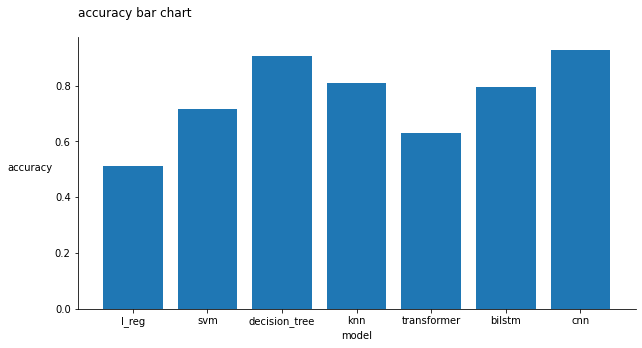

In [466]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax.bar(accuracies.keys(), accuracies.values())
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel('accuracy', rotation=0, labelpad=25)
plt.xlabel('model')
plt.title('accuracy bar chart', loc='left', pad=20);
plt.show()

# Part 3

## Ensemble

In [236]:
#x has 28 features
train_ratio = 0.9
l = int(train_ratio * len(x))
x_train = x.iloc[:l]
y_train = y.iloc[:l]
x_test = x.iloc[l:]
y_test = y.iloc[l:]

In [239]:
# # reshape input to be 3D [samples, timesteps, features]
train_X = x_train.values.reshape((x_train.shape[0], x_train.shape[1], 1))
test_X = x_test.values.reshape((x_test.shape[0], x_test.shape[1], 1))

In [240]:
#set labels for training data to categorical
train_y = to_categorical(y_train, 2)

## Decision Tree

In [249]:
from sklearn.tree import DecisionTreeClassifier 
import pickle

clf = DecisionTreeClassifier()

clf = clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

In [250]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       139
           1       0.87      0.95      0.91       124

    accuracy                           0.91       263
   macro avg       0.91      0.91      0.91       263
weighted avg       0.92      0.91      0.91       263



In [254]:
import pickle
with open('model_1.pickle', 'wb') as handle:
    pickle.dump(clf, handle)

## Transformer

In [241]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(2, activation="softmax")(x)
    return keras.Model(inputs, outputs)


In [242]:
input_shape = train_X.shape[1:]

model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=8,
    mlp_units=[128],
    mlp_dropout=0.1,
    dropout=0.2,
)

model.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-3, decay=1e-3/10),
    metrics=["categorical_accuracy"],
)

history = model.fit(
    train_X,
    train_y,
    epochs=15,
    batch_size=32,
)

Epoch 1/15
74/74 [==============================] - 36s 385ms/step - loss: 0.6103 - categorical_accuracy: 0.6761
Epoch 2/15
74/74 [==============================] - 29s 385ms/step - loss: 0.5167 - categorical_accuracy: 0.7503
Epoch 3/15
74/74 [==============================] - 30s 406ms/step - loss: 0.4573 - categorical_accuracy: 0.7957
Epoch 4/15
74/74 [==============================] - 29s 397ms/step - loss: 0.4227 - categorical_accuracy: 0.8080
Epoch 5/15
74/74 [==============================] - 28s 385ms/step - loss: 0.3941 - categorical_accuracy: 0.8292
Epoch 6/15
74/74 [==============================] - 25s 343ms/step - loss: 0.3683 - categorical_accuracy: 0.8415
Epoch 7/15
74/74 [==============================] - 25s 339ms/step - loss: 0.3550 - categorical_accuracy: 0.8487
Epoch 8/15
74/74 [==============================] - 28s 376ms/step - loss: 0.3360 - categorical_accuracy: 0.8499
Epoch 9/15
74/74 [==============================] - 27s 371ms/step - loss: 0.3231 - categorical_

In [243]:
pred = model.predict(test_X)
#reshape again
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1],))

In [244]:
pred = np.argmax(pred, axis=1)

In [245]:
print(classification_report(y_test, pred, zero_division=0,))

              precision    recall  f1-score   support

           0       1.00      0.40      0.57       139
           1       0.60      1.00      0.75       124

    accuracy                           0.68       263
   macro avg       0.80      0.70      0.66       263
weighted avg       0.81      0.68      0.65       263



In [246]:
model.save('model_2')

INFO:tensorflow:Assets written to: model_2/assets


INFO:tensorflow:Assets written to: model_2/assets


In [467]:
#x_s has 10 features
x_s = x[rforest_features]
train_ratio = 0.9
l = int(train_ratio * len(x_))
x_train = x_s.iloc[:l]
y_train = y.iloc[:l]
x_test = x_s.iloc[l:]
y_test = y.iloc[l:]

In [468]:
# # reshape input to be 3D [samples, timesteps, features]
train_X = x_train.values.reshape((x_train.shape[0], x_train.shape[1], 1))
test_X = x_test.values.reshape((x_test.shape[0], x_train.shape[1], 1))

In [469]:
#set labels for training data to categorical
train_y = to_categorical(y_train, 2)

In [474]:
model = Sequential()
neurons = 64
epochs = 25
dropout = 0.2
batch_size = 32
activ_func = "ReLU"

model.add(Conv1D(neurons, kernel_size=2, padding='same', input_shape=(train_X.shape[1], train_X.shape[2]), activation=activ_func))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Dropout(dropout))

model.add(Conv1D(neurons, kernel_size=2, padding='same', activation=activ_func))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Dropout(dropout))

model.add(Conv1D(neurons, kernel_size=2, padding='same', activation=activ_func))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Dropout(dropout))

model.add(Conv1D(neurons, kernel_size=2, padding='same', activation=activ_func))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Dropout(dropout))

model.add(Conv1D(neurons, kernel_size=2, padding='same', activation=activ_func))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Dropout(dropout))

#flatten and add a dense layer and to output the prediction
model.add(Flatten())
model.add(Dense(2, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [475]:
# fit network
history = model.fit(train_X, train_y, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=False)

Epoch 1/25
74/74 [==============================] - 1s 6ms/step - loss: 0.6648 - accuracy: 0.5880
Epoch 2/25
74/74 [==============================] - 0s 6ms/step - loss: 0.6598 - accuracy: 0.5990
Epoch 3/25
74/74 [==============================] - 0s 6ms/step - loss: 0.6369 - accuracy: 0.6524
Epoch 4/25
74/74 [==============================] - 0s 6ms/step - loss: 0.6263 - accuracy: 0.6600
Epoch 5/25
74/74 [==============================] - 0s 6ms/step - loss: 0.6200 - accuracy: 0.6783
Epoch 6/25
74/74 [==============================] - 0s 5ms/step - loss: 0.6052 - accuracy: 0.6740
Epoch 7/25
74/74 [==============================] - 0s 6ms/step - loss: 0.6134 - accuracy: 0.6537
Epoch 8/25
74/74 [==============================] - 0s 6ms/step - loss: 0.5911 - accuracy: 0.7020
Epoch 9/25
74/74 [==============================] - 0s 5ms/step - loss: 0.5746 - accuracy: 0.6978
Epoch 10/25
74/74 [==============================] - 0s 5ms/step - loss: 0.5642 - accuracy: 0.7105
Epoch 11/25
74/74 [

In [476]:
pred = model.predict(test_X)
#reshape again
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1],))
pred = np.argmax(pred, axis=1)

In [477]:
print(classification_report(y_test, pred, zero_division=0,))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       139
           1       0.90      0.94      0.92       124

    accuracy                           0.92       263
   macro avg       0.92      0.93      0.92       263
weighted avg       0.93      0.92      0.92       263



In [478]:
model.save('model_3')

INFO:tensorflow:Assets written to: model_3/assets


INFO:tensorflow:Assets written to: model_3/assets


In [304]:
model = Sequential()
neurons = 64
epochs = 20
dropout = 0.2
batch_size = 64
activ_func = "linear"

model.add(Bidirectional(LSTM(neurons, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2]), activation=activ_func)))
model.add(Dropout(dropout))

model.add(Bidirectional(LSTM(neurons, return_sequences=False, activation=activ_func)))
model.add(Dropout(dropout))

model.add(Dense(2, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [305]:
# fit network
history = model.fit(train_X, train_y, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=False)

Epoch 1/20
37/37 [==============================] - 5s 25ms/step - loss: 0.6601 - accuracy: 0.6049
Epoch 2/20
37/37 [==============================] - 1s 21ms/step - loss: 0.6468 - accuracy: 0.6189
Epoch 3/20
37/37 [==============================] - 1s 22ms/step - loss: 0.6441 - accuracy: 0.6172
Epoch 4/20
37/37 [==============================] - 1s 22ms/step - loss: 0.6436 - accuracy: 0.6231
Epoch 5/20
37/37 [==============================] - 1s 21ms/step - loss: 0.6421 - accuracy: 0.6198
Epoch 6/20
37/37 [==============================] - 1s 21ms/step - loss: 0.6413 - accuracy: 0.6231
Epoch 7/20
37/37 [==============================] - 1s 22ms/step - loss: 0.6408 - accuracy: 0.6198
Epoch 8/20
37/37 [==============================] - 1s 21ms/step - loss: 0.6395 - accuracy: 0.6248
Epoch 9/20
37/37 [==============================] - 1s 21ms/step - loss: 0.6370 - accuracy: 0.6354
Epoch 10/20
37/37 [==============================] - 1s 21ms/step - loss: 0.6339 - accuracy: 0.6367
Epoch 11/

In [306]:
pred = model.predict(test_X)
#reshape again
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1],))
pred = np.argmax(pred, axis=1)

In [307]:
print(classification_report(y_test, pred, zero_division=0,))

              precision    recall  f1-score   support

           0       0.83      0.73      0.77       139
           1       0.73      0.83      0.78       124

    accuracy                           0.78       263
   macro avg       0.78      0.78      0.78       263
weighted avg       0.78      0.78      0.78       263



In [308]:
model.save('model_4')

INFO:tensorflow:Assets written to: model_4/assets


INFO:tensorflow:Assets written to: model_4/assets


* start ensembling

In [309]:
from keras.models import load_model

In [489]:
with open('model_1.pickle', 'rb') as handle:
    model_1 = pickle.load(handle)
model_2 = load_model('model_2')
model_3 = load_model('model_3')
model_4 = load_model('model_4')

In [490]:
#x has 28 features
train_ratio = 0.9
l = int(train_ratio * len(x))
x_test = x.iloc[l:]
y_test = y.iloc[l:]
test_X = x_test.values.reshape((x_test.shape[0], x_test.shape[1], 1))

In [491]:
pred_1 = model_1.predict(x_test)
pred_2 = model_2.predict(test_X)
pred_2 = np.argmax(pred_2, axis=1)

In [492]:
#x_s has 10 features
train_ratio = 0.9
l = int(train_ratio * len(x))
x_test = x_s.iloc[l:]
y_test = y.iloc[l:]
test_X = x_test.values.reshape((x_test.shape[0], x_test.shape[1], 1))

In [493]:
pred_3 = model_3.predict(test_X)
pred_3 = np.argmax(pred_3, axis=1)

In [494]:
pred_4 = model_4.predict(test_X)
pred_4 = np.argmax(pred_4, axis=1)

In [495]:
pred_final = []
for i in range(len(pred_1)):
    count = 0
    count += pred_1[i]
    count += pred_2[i]
    count += pred_3[i]
    count += pred_4[i]
    pred_final.append(1 if count > 2 else 0)

In [496]:
print(classification_report(y_test, pred_final, zero_division=0,))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       139
           1       0.87      0.94      0.91       124

    accuracy                           0.91       263
   macro avg       0.91      0.91      0.91       263
weighted avg       0.91      0.91      0.91       263

